In [17]:
import jsonlines
import pandas as pd

In [18]:
#detailed_results_path = 'results/detailed_model_results_Corsair_224_20241201.jsonl'
detailed_results_path = 'results/detailed_model_results_DESKTOP-UHDJ875_512_20241201.jsonl'

In [19]:
with jsonlines.open(detailed_results_path) as reader:
    data = list(reader)

In [20]:
# Normalize the nested 'Results' into separate records
records = []
for run in data:
    model = run["Model"]
    run_num = run["Run"]
    timestamp = run.get("Timestamp", "")
    for pathology_result in run["Results"]:
        record = {
            "Model": model,
            "Run": run_num,
            "Timestamp": timestamp,
            "Pathology": pathology_result["Pathology"],
            "Validation AUC": pathology_result["Validation AUC"],
            "Test AUC": pathology_result["Test AUC"],
            "Validation Predictions": pathology_result["Validation Predictions"],
            "Validation Actuals": pathology_result["Validation Actuals"],
            "Test Predictions": pathology_result["Test Predictions"],
            "Test Actuals": pathology_result["Test Actuals"],
        }
        records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Display the first few rows
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
      Model  Run            Timestamp      Pathology  Validation AUC  \
0  resnet50    1  2024-12-01 17:47:16    Atelectasis        0.779260   
1  resnet50    1  2024-12-01 17:47:16   Cardiomegaly        0.842937   
2  resnet50    1  2024-12-01 17:47:16  Consolidation        0.763787   
3  resnet50    1  2024-12-01 17:47:16          Edema        0.890331   
4  resnet50    1  2024-12-01 17:47:16       Effusion        0.851499   

   Test AUC                             Validation Predictions  \
0  0.717120  [0.04427538812160492, 0.02863662876188755, 0.0...   
1  0.822048  [0.004028052091598511, 0.002773246029391885, 0...   
2  0.712342  [0.007485369220376015, 0.0069955261424183846, ...   
3  0.816105  [0.0005367450648918748, 0.0027566771022975445,...   
4  0.766870  [0.023302247747778893, 0.03605649247765541, 0....   

                                  Validation Actuals  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0

In [21]:
# Display basic information about the DataFrame
print("\nDataFrame Information:")
print(df.info())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique models and pathologies
print("\nUnique Models:", df["Model"].unique())
print("Unique Pathologies:", df["Pathology"].unique())

# Count of runs per model
print("\nRuns per Model:")
print(df.groupby("Model")["Run"].nunique())

# Count of runs per model and pathology
print("\nRuns per Model and Pathology:")
print(df.groupby(["Model", "Pathology"]).size().unstack(fill_value=0))
df


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   98 non-null     object 
 1   Run                     98 non-null     int64  
 2   Timestamp               98 non-null     object 
 3   Pathology               98 non-null     object 
 4   Validation AUC          98 non-null     float64
 5   Test AUC                98 non-null     float64
 6   Validation Predictions  98 non-null     object 
 7   Validation Actuals      98 non-null     object 
 8   Test Predictions        98 non-null     object 
 9   Test Actuals            98 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.8+ KB
None

Summary Statistics:
             Run  Validation AUC   Test AUC
count  98.000000       98.000000  98.000000
mean    2.571429        0.782078   0.753483
std     1.406905 

,Model,Run,Timestamp,Pathology,Validation AUC,Test AUC,Validation Predictions,Validation Actuals,Test Predictions,Test Actuals
0,resnet50,1,2024-12-01 17:47:16,Atelectasis,0.779260,0.717120,"[0.04427538812160492, 0.02863662876188755, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07401875406503677, 0.028131773695349693, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,resnet50,1,2024-12-01 17:47:16,Cardiomegaly,0.842937,0.822048,"[0.004028052091598511, 0.002773246029391885, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.00030146990320645273, 0.007711353246122599,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,resnet50,1,2024-12-01 17:47:16,Consolidation,0.763787,0.712342,"[0.007485369220376015, 0.0069955261424183846, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.015009269118309021, 0.01018507219851017, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,resnet50,1,2024-12-01 17:47:16,Edema,0.890331,0.816105,"[0.0005367450648918748, 0.0027566771022975445,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.200327283702791e-05, 0.00183707510586828, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,resnet50,1,2024-12-01 17:47:16,Effusion,0.851499,0.766870,"[0.023302247747778893, 0.03605649247765541, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.01256996113806963, 0.07765192538499832, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
93,resnet101,2,2024-12-02 09:44:23,Mass,0.796024,0.739736,"[0.022248998284339905, 0.03563500940799713, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.04992614686489105, 0.020433960482478142, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
94,resnet101,2,2024-12-02 09:44:23,Nodule,0.712967,0.688801,"[0.10377684980630875, 0.04832812771201134, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07729005068540573, 0.07826565206050873, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
95,resnet101,2,2024-12-02 09:44:23,Pleural_Thickening,0.750949,0.718991,"[0.04770969599485397, 0.012085317634046078, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.04336056485772133, 0.061099838465452194, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
96,resnet101,2,2024-12-02 09:44:23,Pneumonia,0.677876,0.693710,"[0.011812292039394379, 0.002675278577953577, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.01475570723414421, 0.008160839788615704, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


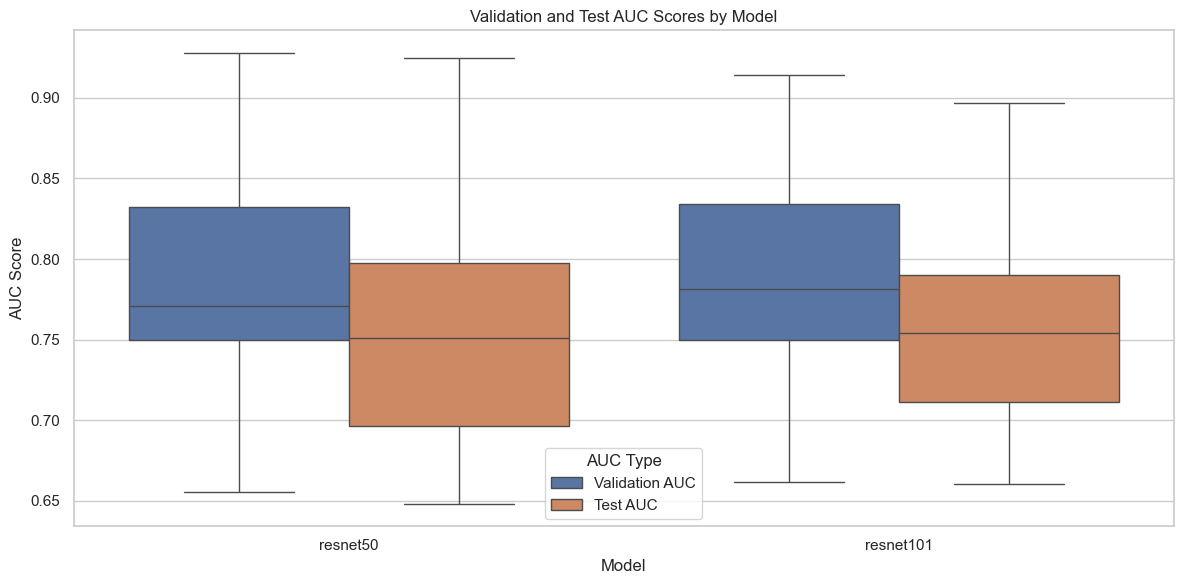

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Melt the DataFrame to have AUC types as a variable
df_melted = df.melt(id_vars=["Model", "Pathology"], 
                    value_vars=["Validation AUC", "Test AUC"],
                    var_name="AUC Type", 
                    value_name="AUC Score")

# Create a boxplot
sns.boxplot(x="Model", y="AUC Score", hue="AUC Type", data=df_melted)

# Add title and labels
plt.title("Validation and Test AUC Scores by Model")
plt.xlabel("Model")
plt.ylabel("AUC Score")
plt.legend(title="AUC Type")

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
# Show mean +- std for each model
print("\nMean and Standard Deviation of AUC Scores by Model:")
print(df.groupby("Model")["Validation AUC"].agg(["mean", "std"]))
print(df.groupby("Model")["Test AUC"].agg(["mean", "std"]))


Mean and Standard Deviation of AUC Scores by Model:
               mean       std
Model                        
resnet101  0.782942  0.070150
resnet50   0.781732  0.070452
               mean       std
Model                        
resnet101  0.754397  0.060768
resnet50   0.753118  0.064777


In [26]:
# Aggregate data by `Model` and `Pathology`
aggregated = (
    df.groupby(["Pathology", "Model"])
    .agg(mean=("Validation AUC", "mean"), std=("Validation AUC", "std"))
    .reset_index()
)

# Format the mean and std as a single column
aggregated["Result"] = (
    aggregated["mean"].round(4).astype(str) + " ± " + aggregated["std"].round(4).astype(str)
)

# Pivot to get the desired table
pivot_table = aggregated.pivot(index="Pathology", columns="Model", values="Result")

# Replace NaN with "—"
pivot_table = pivot_table.fillna("—")

In [27]:
pivot_table

Model,resnet101,resnet50
Pathology,,
Atelectasis,0.7851 ± 0.0027,0.7707 ± 0.0121
Cardiomegaly,0.8343 ± 0.0005,0.8395 ± 0.0079
Consolidation,0.7759 ± 0.0051,0.7593 ± 0.0064
Edema,0.896 ± 0.0035,0.8914 ± 0.0081
Effusion,0.8527 ± 0.0033,0.8445 ± 0.0099
Emphysema,0.7575 ± 0.0106,0.7599 ± 0.0083
Fibrosis,0.7556 ± 0.0102,0.7645 ± 0.0058
Hernia,0.8974 ± 0.024,0.9061 ± 0.0189
Infiltration,0.6623 ± 0.0008,0.6637 ± 0.0063
